In [2]:
%config InlineBackend.figure_formats = ['svg']
import oscovida as ov

/Users/fangohr/git/oscovida/oscovida/oscovida.py:799: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if region_label is not "" and habitants:


In [2]:
ov.display_binder_link("tutorial-acessing-cases-and-deaths.ipynb")

[Execute this notebook with Binder](https://mybinder.org/v2/gh/oscovida/binder/master?filepath=ipynb/tutorial-acessing-cases-and-deaths.ipynb)

# OSCOVIDA Tutorial:
# Loading COVID19 data on cases and infections for a country

The main function to access numbers of infections and deaths as a function of time is `get_country_data`. Here are some examples:

In [3]:
cases, deaths = ov.get_country_data("Italy")

We now have a Pandas Series object with the `cases` and the `deaths`:

In [4]:
cases

2020-01-22         0
2020-01-23         0
2020-01-24         0
2020-01-25         0
2020-01-26         0
               ...  
2020-10-19    423578
2020-10-20    434449
2020-10-21    449648
2020-10-22    465726
2020-10-23    484869
Freq: D, Name: Italy cases, Length: 276, dtype: object

In [5]:
deaths

2020-01-22        0
2020-01-23        0
2020-01-24        0
2020-01-25        0
2020-01-26        0
              ...  
2020-10-19    36616
2020-10-20    36705
2020-10-21    36832
2020-10-22    36968
2020-10-23    37059
Freq: D, Name: Italy deaths, Length: 276, dtype: object

As a quick check, we can plot the cumulative numbers we have retrieved:

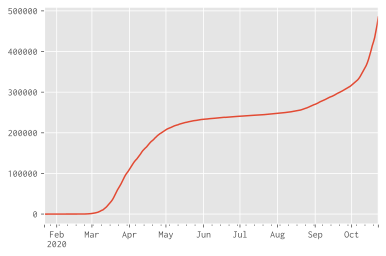

In [6]:
cases.plot();

Or, if we are interested in the changes from day to day (i.e. to see the new infection per day as a function of time), we can use the `diff()` function that is provided for the Series object:

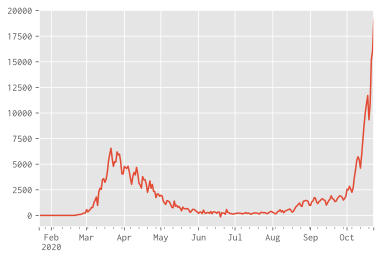

In [7]:
cases.diff().plot();

# Regional information within countries

For some countries, such as Germany and the US, further regional information is available:

## Germany

In Germany, there is a two-level subclassification: there are 16 Bundeslaender (called `regions` in oscovida) and for each Bundesland there are many Landkreise (called 'subregions' in oscovida). 

Here is how to retrieve such data, for example for the Bundesland Schleswig-Holstein:

In [8]:
cases, deaths = ov.get_country_data("Germany", region="Schleswig-Holstein")

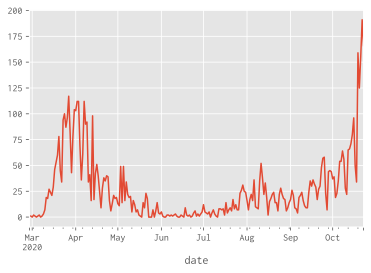

In [9]:
cases.diff().plot();

To retrieve data for a Landkreis, we can use this notation: (It is not necessary to specify the region here, as the subregions within Germany are unique)

In [10]:
cases, deaths = ov.get_country_data("Germany", subregion="LK Pinneberg")

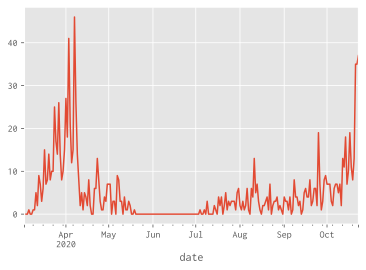

In [11]:
cases.diff().plot();

To get a list of regions in Germany, we can use:

In [12]:
germany = ov.fetch_data_germany()
sorted(germany['Bundesland'].drop_duplicates())

['Baden-Württemberg',
 'Bayern',
 'Berlin',
 'Brandenburg',
 'Bremen',
 'Hamburg',
 'Hessen',
 'Mecklenburg-Vorpommern',
 'Niedersachsen',
 'Nordrhein-Westfalen',
 'Rheinland-Pfalz',
 'Saarland',
 'Sachsen',
 'Sachsen-Anhalt',
 'Schleswig-Holstein',
 'Thüringen']

Similarly, to find the Landkreise, we can use:

In [13]:
germany = ov.fetch_data_germany()
sorted(germany['Landkreis'].drop_duplicates())

['LK Ahrweiler',
 'LK Aichach-Friedberg',
 'LK Alb-Donau-Kreis',
 'LK Altenburger Land',
 'LK Altenkirchen',
 'LK Altmarkkreis Salzwedel',
 'LK Altötting',
 'LK Alzey-Worms',
 'LK Amberg-Sulzbach',
 'LK Ammerland',
 'LK Anhalt-Bitterfeld',
 'LK Ansbach',
 'LK Aschaffenburg',
 'LK Augsburg',
 'LK Aurich',
 'LK Bad Dürkheim',
 'LK Bad Kissingen',
 'LK Bad Kreuznach',
 'LK Bad Tölz-Wolfratshausen',
 'LK Bamberg',
 'LK Barnim',
 'LK Bautzen',
 'LK Bayreuth',
 'LK Berchtesgadener Land',
 'LK Bergstraße',
 'LK Bernkastel-Wittlich',
 'LK Biberach',
 'LK Birkenfeld',
 'LK Bitburg-Prüm',
 'LK Bodenseekreis',
 'LK Borken',
 'LK Breisgau-Hochschwarzwald',
 'LK Burgenlandkreis',
 'LK Böblingen',
 'LK Börde',
 'LK Calw',
 'LK Celle',
 'LK Cham',
 'LK Cloppenburg',
 'LK Coburg',
 'LK Cochem-Zell',
 'LK Coesfeld',
 'LK Cuxhaven',
 'LK Dachau',
 'LK Dahme-Spreewald',
 'LK Darmstadt-Dieburg',
 'LK Deggendorf',
 'LK Diepholz',
 'LK Dillingen a.d.Donau',
 'LK Dingolfing-Landau',
 'LK Dithmarschen',
 'LK 

Note that the Landkreise (LK) which are a Stadt, are labelled with `SK` in the beginning - presumably for Stadtkreis.

## United States

For the United States, we have the states available:

In [14]:
cases, deaths = ov.get_country_data("US", "California")

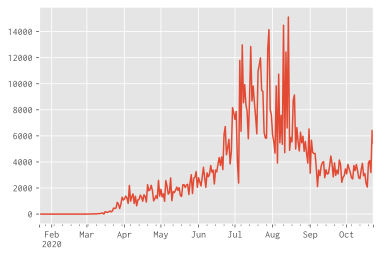

In [15]:
cases.diff().plot();

To get a list of available states, we can use

In [16]:
us_cases = ov.fetch_cases_US()
sorted(us_cases['Province_State'].drop_duplicates())

['Alabama',
 'Alaska',
 'American Samoa',
 'Arizona',
 'Arkansas',
 'California',
 'Colorado',
 'Connecticut',
 'Delaware',
 'Diamond Princess',
 'District of Columbia',
 'Florida',
 'Georgia',
 'Grand Princess',
 'Guam',
 'Hawaii',
 'Idaho',
 'Illinois',
 'Indiana',
 'Iowa',
 'Kansas',
 'Kentucky',
 'Louisiana',
 'Maine',
 'Maryland',
 'Massachusetts',
 'Michigan',
 'Minnesota',
 'Mississippi',
 'Missouri',
 'Montana',
 'Nebraska',
 'Nevada',
 'New Hampshire',
 'New Jersey',
 'New Mexico',
 'New York',
 'North Carolina',
 'North Dakota',
 'Northern Mariana Islands',
 'Ohio',
 'Oklahoma',
 'Oregon',
 'Pennsylvania',
 'Puerto Rico',
 'Rhode Island',
 'South Carolina',
 'South Dakota',
 'Tennessee',
 'Texas',
 'Utah',
 'Vermont',
 'Virgin Islands',
 'Virginia',
 'Washington',
 'West Virginia',
 'Wisconsin',
 'Wyoming']

## Hungary


For Hungary, more regional data is available for the following regions:

In [17]:
ov.get_counties_hungary()

['Bács-Kiskun',
 'Baranya',
 'Békés',
 'Borsod-Abaúj-Zemplén',
 'Budapest',
 'Csongrád',
 'Fejér',
 'Győr-Moson-Sopron',
 'Hajdú-Bihar',
 'Heves',
 'Jász-Nagykun-Szolnok',
 'Komárom-Esztergom',
 'Nógrád',
 'Pest',
 'Somogy',
 'Szabolcs-Szatmár-Bereg',
 'Tolna',
 'Vas',
 'Veszprém',
 'Zala']

As before, the `get_country_data` function can be used:

In [18]:
cases, deaths = ov.get_country_data("Hungary", region="Baranya")

In [19]:
cases

Dátum
2020-03-31      20
2020-04-01      19
2020-04-02      19
2020-04-03      21
2020-04-04      21
              ... 
2020-10-18    1281
2020-10-19    1310
2020-10-20    1338
2020-10-21    1361
2020-10-22    1416
Freq: D, Name: Hungary-Baranya cases, Length: 206, dtype: int64

However, no data on deaths is available for Hungary, so the `deaths` object is just a `None` object:

In [20]:
deaths

# Export data 

The data series can be exported to comma separated value files or Excel files using pandas exporting tools. For example:




In [3]:
cases, deaths = ov.get_country_data("Italy")

In [4]:
cases.to_csv("italy-cases.csv")

In [5]:
cases.to_excel("italy-cases.xlsx")

The files are saved on the local disk in the current working directory:

In [6]:
!ls -l italy*

-rw-r--r--  1 fangohr  staff  4783 Oct 27 13:21 italy-cases.csv
-rw-r--r--  1 fangohr  staff  9227 Oct 27 13:21 italy-cases.xlsx


(Note: if you use this notebook on Binder, the files will be saved to the container that Binder has created, i.e. in the cloud, not on your local computer.)

To combine deaths and cases, we can use a convenience function from oscovida:

In [5]:
table = ov.compose_dataframe_summary(cases, deaths)

In [6]:
table

,total cases,daily new cases,total deaths,daily new deaths
2020-10-24,504509,19640,37210,151
2020-10-23,484869,19143,37059,91
2020-10-22,465726,16078,36968,136
2020-10-21,449648,15199,36832,127
2020-10-20,434449,10871,36705,89
...,...,...,...,...
2020-01-27,0,0,0,0
2020-01-26,0,0,0,0
2020-01-25,0,0,0,0
2020-01-24,0,0,0,0


In [7]:
table.to_excel("italy.xlsx")

For other, more customised combination of data series, [pandas](https://pandas.pydata.org/docs/) commands can be used.

# Other tutorials

You can find [more tutorials here](tag-tutorial.html).